# Videogame Score

## Importamos las librerías necesarias
Debe estar ejecutandose el contenedor con la base de datos.

In [1]:
import pandas as pd
from sqlalchemy.engine import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.declarative import declarative_base

DIALECT = 'oracle'
SQL_DRIVER = 'cx_oracle'
USERNAME = 'system'  # enter your username
PASSWORD = 'oracle'  # enter your password
HOST = 'localhost'  # enter the oracle db host url
PORT = 49161  # enter the oracle port number
SERVICE = 'xe'  # enter the oracle db service name
ENGINE_PATH_WIN_AUTH = DIALECT + '+' + SQL_DRIVER + '://' + USERNAME \
    + ':' + PASSWORD + '@' + HOST + ':' + str(PORT) + '/?service_name=' \
    + SERVICE
engine = create_engine(ENGINE_PATH_WIN_AUTH)


## Generamos las queries
Con esto traemos la data estrictamente necesaria para generar los ranking

In [2]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
query_top10 = \
    '''
        SELECT videogame, ranking
        FROM (
            SELECT videogame, ranking
            FROM usr_score.videogame_ranking 
            ORDER BY RANKING DESC
        )
        WHERE ROWNUM <=10'''

query_worst10 = \
    '''
        SELECT videogame, ranking
        FROM (
            SELECT videogame, ranking
            FROM usr_score.videogame_ranking 
            ORDER BY RANKING ASC
        )
        WHERE ROWNUM <=10'''

query_top10_by_console = \
    '''
        SELECT company, console, videogame, ranking
        FROM (
            SELECT company, console, videogame, ranking, RANK() OVER (PARTITION BY company, console ORDER BY  RANKING DESC) rk
            FROM usr_score.videogame_ranking_by_console 
            ORDER BY company, console, RANKING DESC
        )
        WHERE rk <=10'''

query_worst10_by_console = \
    '''
        SELECT company, console, videogame, ranking
        FROM (
            SELECT company, console, videogame, ranking, ROW_NUMBER() OVER (PARTITION BY company, console ORDER BY  RANKING ASC) rk
            FROM usr_score.videogame_ranking_by_console 
            ORDER BY company, console, RANKING DESC
        )
        WHERE rk <=10'''


# Creamos los gráficos

## Top 10 best game

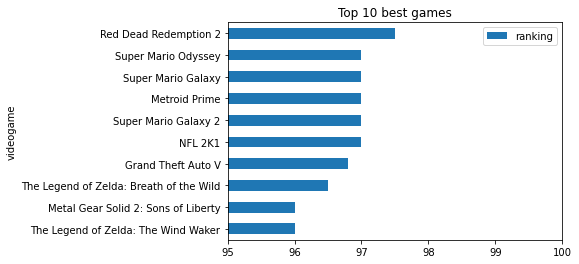

In [3]:
df_ora = pd.read_sql(query_top10, con=engine)
df_ora.sort_values(by=['ranking']).plot(
    title='Top 10 best games',
    kind='barh',
    x='videogame',
    y='ranking',
    xlim=[df_ora['ranking'].min() - 1, 100],
    sort_columns=True,
    );


## Worst 10 best game

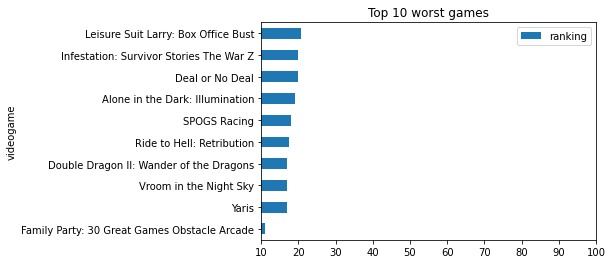

In [4]:
df_ora = pd.read_sql(query_worst10, con=engine)
df_ora.sort_values(by=['ranking']).plot(
    title='Top 10 worst games',
    kind='barh',
    x='videogame',
    y='ranking',
    xlim=[df_ora['ranking'].min() - 1, 100],
    sort_columns=True,
    );

##  Top 10 best games for each console/company

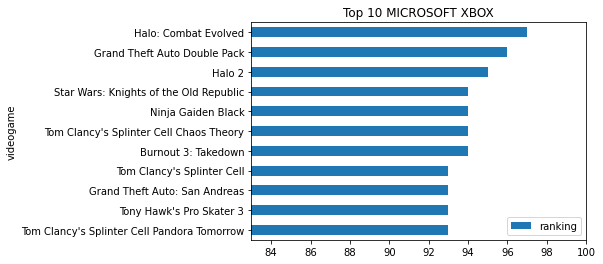

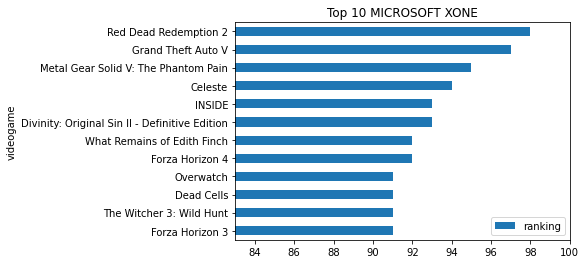

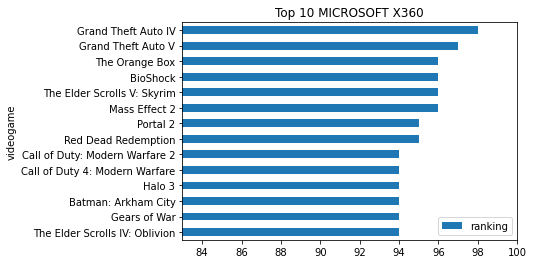

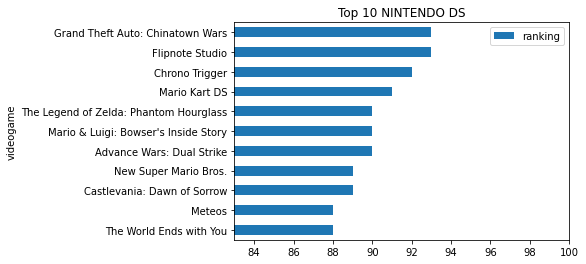

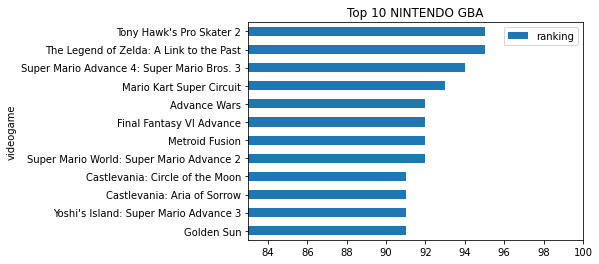

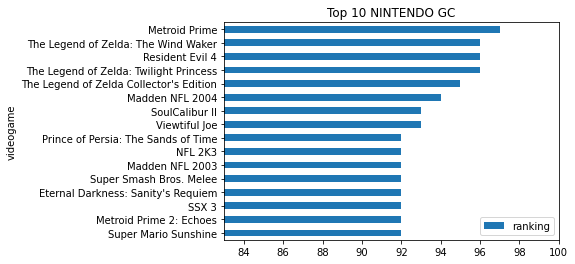

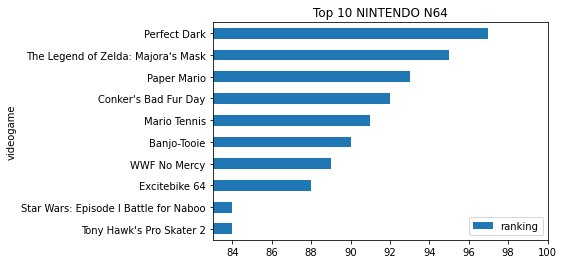

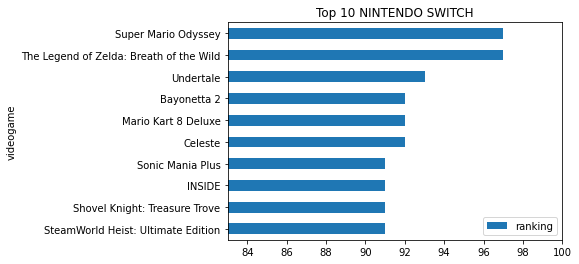

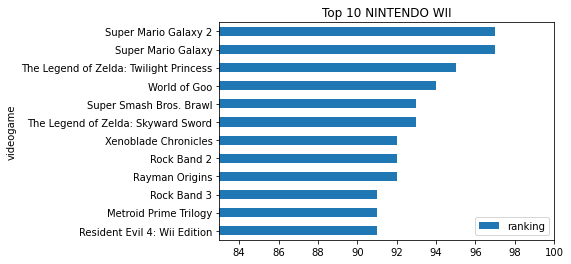

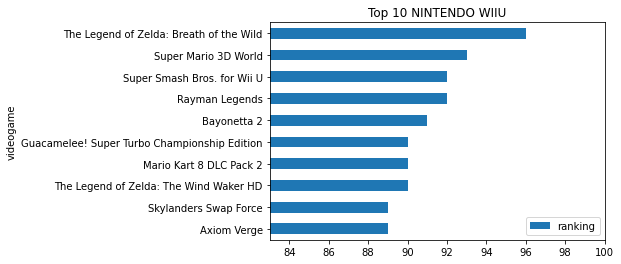

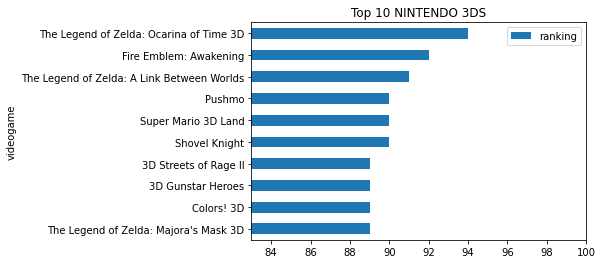

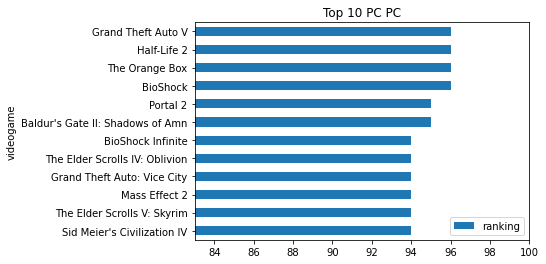

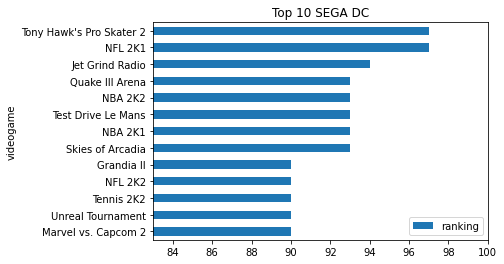

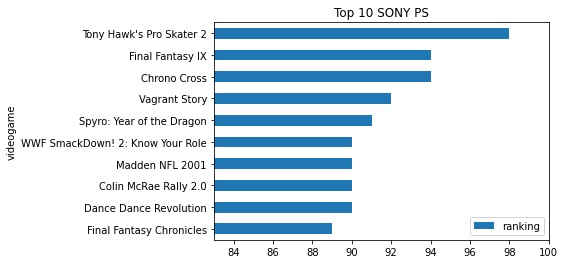

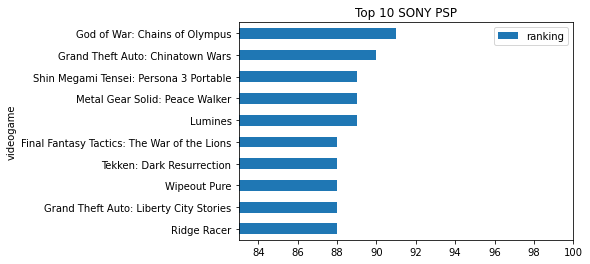

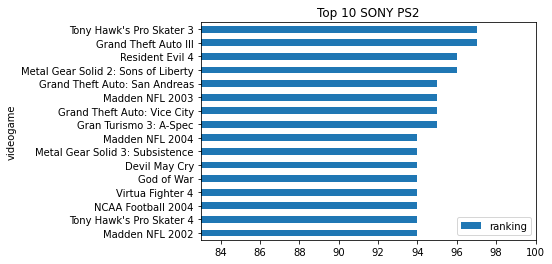

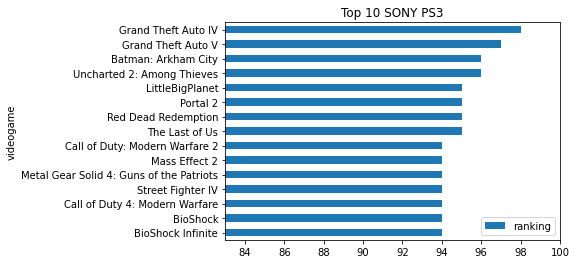

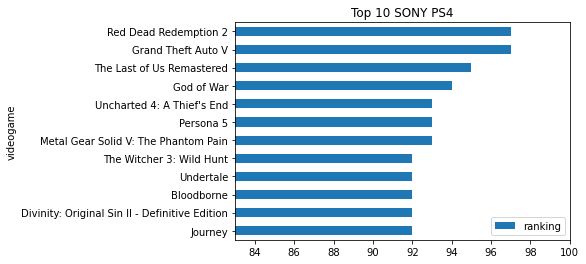

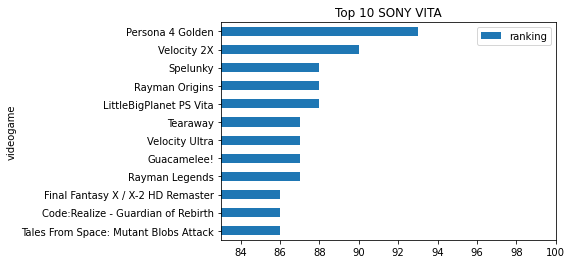

In [5]:
df_ora = pd.read_sql(query_top10_by_console, con=engine)
tempo = df_ora[['company', 'console']].drop_duplicates()
for (index, rank) in tempo.iterrows():
    df = df_ora[(df_ora['company'] == rank['company'])
                & (df_ora['console'] == rank['console'])]
    df.sort_values(by=['ranking']).plot(
        kind='barh',
        x='videogame',
        y='ranking',
        title='Top 10 '+rank['company'] + ' ' + rank['console'],
        xlim=[df_ora['ranking'].min() - 1, 100],
        sort_columns=True,
        )


##  Worst  10 best games for each console/company

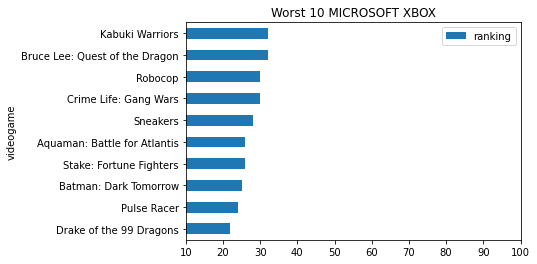

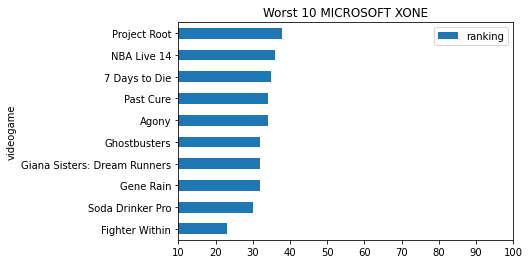

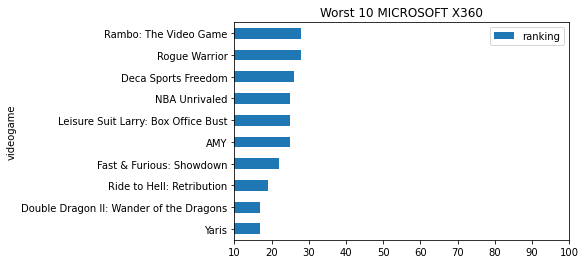

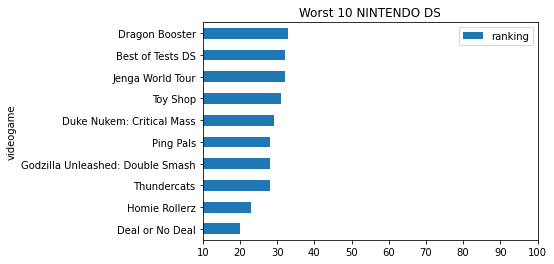

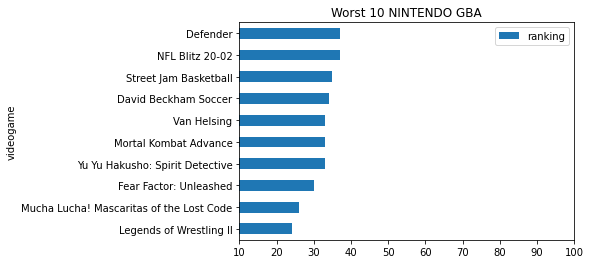

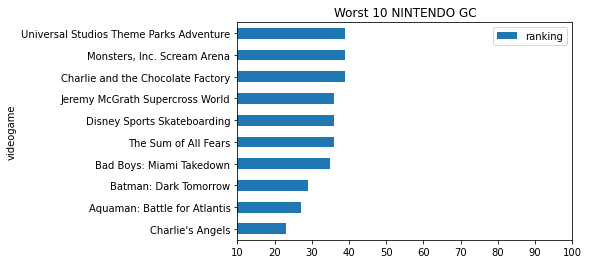

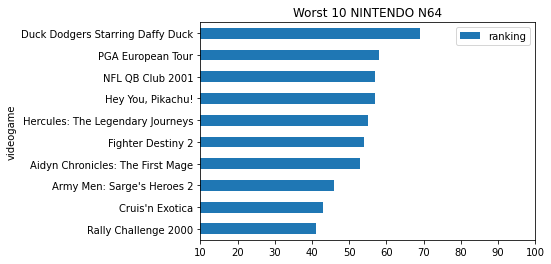

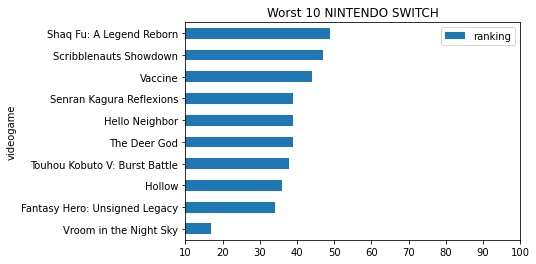

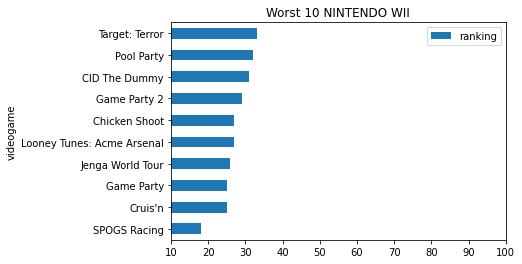

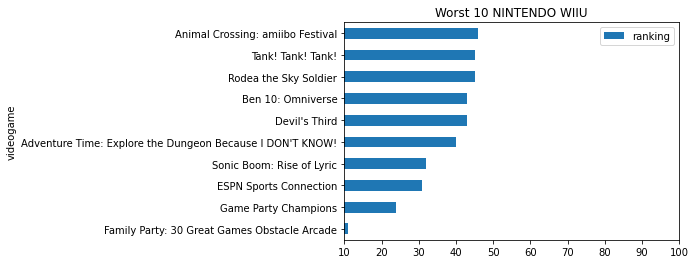

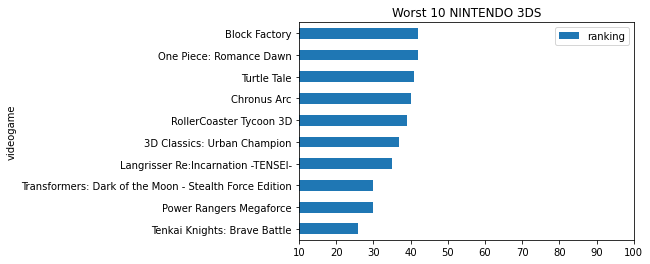

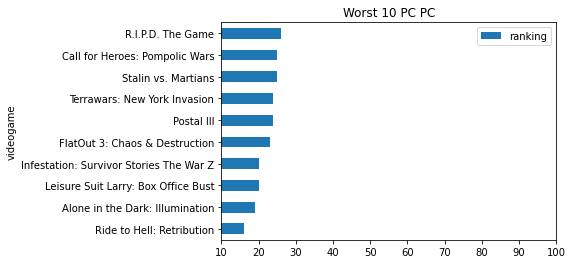

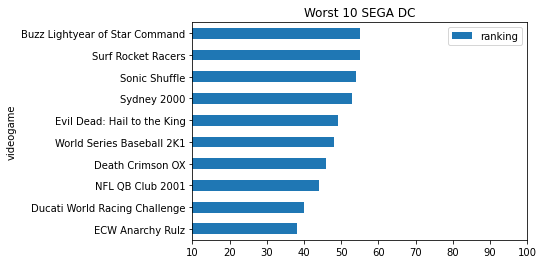

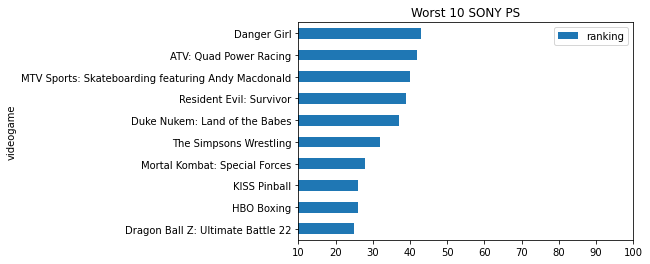

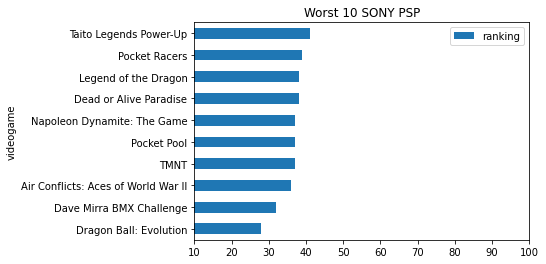

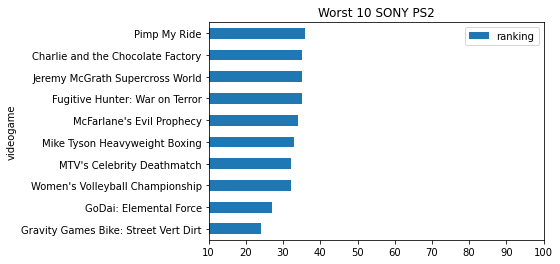

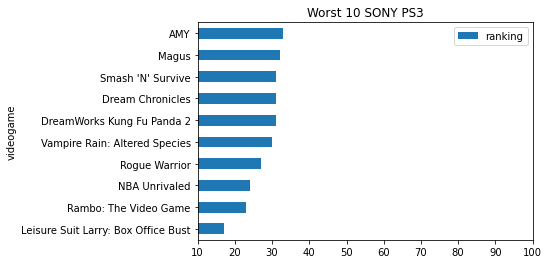

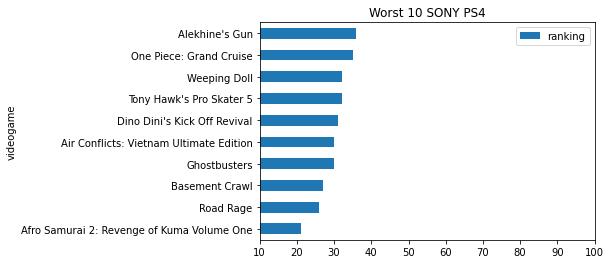

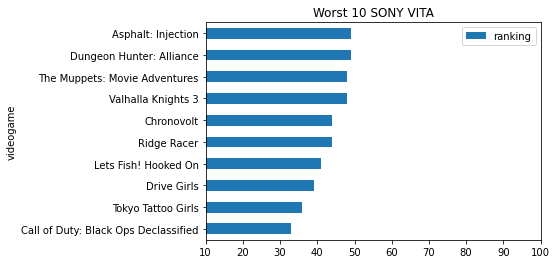

In [6]:
df_ora = pd.read_sql(query_worst10_by_console, con=engine)
tempo = df_ora[['company', 'console']].drop_duplicates()
for (index, rank) in tempo.iterrows():
    df = df_ora[(df_ora['company'] == rank['company'])
                & (df_ora['console'] == rank['console'])]
    df.sort_values(by=['ranking']).plot(
        kind='barh',
        x='videogame',
        y='ranking',
        title='Worst 10 '+rank['company'] + ' ' + rank['console'],
        xlim=[df_ora['ranking'].min() - 1, 100],
        sort_columns=True,
        )
